In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## loading spacy to use sentiment analysis

In [ ]:
!pip install spacy==3.4.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.4/6.4 MB 31.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 75.7 MB/s eta 0:00:00
  Attempting uninstall: wasabi
    Found existing installation: wasabi 1.1.1
    Uninstalling wasabi-1.1.1:
      Successfully uninstalled wasabi-1.1.1
  Attempting uninstall: typer
    Found existing installation: typer 0.7.0
    Uninstalling typer-0.7.0:
      Successfully uninstalled typer-0.7.0
  Attempting uninstall: pydantic
    Found existing installation: pydantic 1.10.7
    Uninstalling pydantic-1.10.7:
      Successfully uninstalled pydantic-1.10.7
  Attempting uninstall: spacy
    Found existing installation: spacy 3.5.2
    Uninstalling spacy-3.5.2:
      Successfully uninstalled spacy-3.5.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the s

In [ ]:
import spacy
spacy.__version__

'3.4.0'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Installing the sentiments counter  from Github

In [ ]:
#!python -m spacy download en_core_web_sm
!pip install git+https://github.com/medianeuroscience/emfdscore.git

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/medianeuroscience/emfdscore.git to /tmp/pip-req-build-_p264fis
  Running command git clone --filter=blob:none --quiet https://github.com/medianeuroscience/emfdscore.git /tmp/pip-req-build-_p264fis
  Resolved https://github.com/medianeuroscience/emfdscore.git to commit 64dfaea0cdb00f11921dc6278d46201d73128a80
  Preparing metadata (setup.py) ... done
  Created wheel for emfdscore: filename=emfdscore-0.0.1-py3-none-any.whl size=1499075 sha256=cf7519a06a19e1c504b5dbed992d24c72ff7cead65b43d9b63ece78d63b5cbfd
  Stored in directory: /tmp/pip-ephem-wheel-cache-qaq368j_/wheels/eb/60/10/f58ae14ec3dd67bda67956be88125f0ce4172e16df5abeadc1
Successfully built emfdscore


## Loading my data

In [ ]:
!gdown --id 1N0U-i4PxT_DmTru0r7T5po-9f9cwGgB8 -O RedditComments2.csv
!gdown --id 1dlV7huXQfim8brL7LIBy-M2kFR63P2Oh -O Reddit_metadata2.csv

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1N0U-i4PxT_DmTru0r7T5po-9f9cwGgB8
To: /content/RedditComments2.csv
100% 4.30M/4.30M [00:00<00:00, 37.7MB/s]
/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1dlV7huXQfim8brL7LIBy-M2kFR63P2Oh
To: /content/Reddit_metadata2.csv
100% 15.3k/15.3k [00:00<00:00, 41.9MB/s]


In [ ]:
!pip install autocorrect
!pip install nltk
#!pip install nltk.corpus
!pip install unidecode

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 622.8/622.8 kB 15.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for autocorrect: filename=autocorrect-2.6.1-py3-none-any.whl size=622363 sha256=dddcf239d60efac8c6de07d4e5ade4dc7f88006480a266cf577048eae26ba58d
  Stored in directory: /root/.cache/pip/wheels/b5/7b/6d/b76b29ce11ff8e2521c8c7dd0e5bfee4fb1789d76193124343
Successfully built autocorrect
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.9/235.9 kB 9.8 MB/s eta 0:00:00


In [ ]:
!pip install -U nltk

In [ ]:
import unidecode
import pandas as pd
import re
import time
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from autocorrect import Speller
from bs4 import BeautifulSoup
from nltk.corpus import stopwords
from nltk import word_tokenize
import string

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


## Defining the contracting words to change them in the text

In [ ]:
contractions = {
"ain't": "am not",
"aren't": "are not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he had",
"he'd've": "he would have",
"he'll": "he will",
"he'll've": "he shall have",
"he's": "he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how is",
"i'd": "I had",
"i'd've": "I would have",
"i'll": "I will",
"i'll've": "I will have",
"i'm": "I am",
"i've": "I have",
"isn't": "is not",
"it'd": "it had",
"it'd've": "it would have",
"it'll": "it will",
"it'll've": "it shall have",
"it's": "it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she had",
"she'd've": "she would have",
"she'll": "she will",
"she'll've": "she will have",
"she's": "she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so is",
"that'd": "that had",
"that'd've": "that would have",
"that's": "that is",
"there'd": "there had",
"there'd've": "there would have",
"there's": "there is",
"they'd": "they had",
"they'd've": "they would have",
"they'll": "they will",
"they'll've": "they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we had",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what will",
"what'll've": "what will have",
"what're": "what are",
"what's": "what is",
"what've": "what have",
"when's": "when is",
"when've": "when have",
"where'd": "where did",
"where's": "where is",
"where've": "where have",
"who'll": "who will",
"who'll've": "who will have",
"who's": "who is",
"who've": "who have",
"why's": "why is",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you had",
"you'd've": "you would have",
"you'll": "you will",
"you'll've": "you will have",
"you're": "you are",
"you've": "you have"
}

In [ ]:
for word in text.split():
    if word.lower() in contractions:
        text = text.replace(word, contractions[word.lower()])

# loading some functions for cleaning the text

In [ ]:
nltk.download('punkt')
class TextCleaning():
  def __init__(self, text):
    self.text = text

  def do_the_thing(self):

    self.text = self.lower_casing_text()

    self.text = self.spelling_correction()

    self.text = self.fix_contractions()

    #self.text = self.reducing_incorrect_character_repeatation()
    self.text = self.accented_characters_removal()

    self.text = self.remove_newlines_tabs()

    self.text = self.removing_special_characters()
    #print("removing special characters ", self.text[0])
    self.text = self.remove_links()
    #print("removing links ", self.text[0])
    self.text = self.remove_whitespace()
    #print("removing white space ", self.text[0])
    self.text = self.removing_stopwords()
    #print("removing stop words ", self.text[0])
    return self.text

  def fix_contractions(self):

    text_final = []
    for comm in self.text:
      for word in comm.split():
        if word in contractions:
          comm = comm.replace(word, contractions[word])
      text_final.append(comm)

    return text_final


  def remove_newlines_tabs(self):

    text_comm_list = [comm.replace('\\n', '').replace('\n', '').replace('\t','').replace('\\', '').replace('. com', '.com')\
                      for comm in self.text]
    return text_comm_list

  def accented_characters_removal(self):

    text = [unidecode.unidecode(comm) for comm in self.text]
    return text

  def lower_casing_text(self):

    text = [comm.lower() for comm in self.text]
    return text

  def removing_special_characters(self):


    formatted_text = [re.sub(r"[^a-zA-Z0-9:$-,%.?!]+", ' ', comm) for comm in self.text]
    return formatted_text

  def removing_stopwords(self):
    stoplist = stopwords.words('english')
    stoplist = set(stoplist)

    #text = [repr(comm) for comm in self.text]

    text_ = []
    for sentence in self.text:
      stopWords = [word for word in word_tokenize(sentence) if word.lower() not in stoplist ]

      words_string = ' '.join(stopWords)
      text_.append(words_string)
    return text_

  def spelling_correction(self):

      spell = Speller(lang='en')
      corrected_text = [spell(comm) for comm in self.text]

      return corrected_text

  def remove_links(self):


    remove_https = [re.sub(r'http\S+', '', comm) for comm in self.text]
    remove_com = [re.sub(r"\ [A-Za-z]*\.com", "", com) for com in remove_https]

    return remove_com

  def remove_whitespace(self):

    pattern = re.compile(r'\s+')
    no_whitespace = [re.sub(pattern, ' ', comm) for comm in self.text]

    text = [comm.replace('?', ' ? ').replace(')', ') ') for comm in no_whitespace]
    return text

  def reducing_incorrect_character_repeatation(self):

    pattern = re.compile(r"([A-Za-z])\1{1,}", re.DOTALL)

    formatted_text = [pattern.sub(r"\1\1", comm) for comm in self.text]

    pattern_punctuation = re.compile(r'([.,/#!$%^&*?;:{}=_`~()+-])\1{1,}')

    combined_formatted = [pattern_punctuation.sub(r'\1', comm) for comm in formatted_text]

    final_format = [re.sub('{2,}','', comm) for comm in combined_formatted]

    return final_format


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


# Loading the two Reddit datasets I have (labeled and unlabeled)

In [ ]:
!gdown --id 1vT1g4Crj6s6z2YNjSyPx5Fvz5KTpBYSB -O annottated_reddit.csv
df_annotated = pd.read_csv("annottated_reddit.csv")
df_annotated.drop_duplicates(inplace= True)
df_annotated.dropna(inplace=True)
df_annotated = df_annotated.iloc[np.where(df_annotated.confidence == "Confident")[0]]
df_annotated.head()

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1vT1g4Crj6s6z2YNjSyPx5Fvz5KTpBYSB
To: /content/annottated_reddit.csv
100% 1.51M/1.51M [00:00<00:00, 9.50MB/s]


,text,subreddit,bucket,annotator,annotation,confidence
1,Or - or - assclowns like Le Pen and Farage cou...,worldnews,French politics,annotator02,Equality,Confident
4,So Republicans really are for liberal policies...,politics,US Politics,annotator03,Equality,Confident
6,&gt; How about the fact that the majority of M...,europe,French politics,annotator01,"Authority,Proportionality",Confident
7,What proportion of tipped workers don't want i...,antiwork,US Politics,annotator04,Proportionality,Confident
8,'I think capitalists are loathsome parasites t...,antiwork,US Politics,annotator02,Equality,Confident


In [ ]:
df_annotated.subreddit.value_counts()

worldnews              494
Conservative           439
antiwork               432
europe                 426
relationship_advice    406
politics               390
AmItheAsshole          353
confession             247
neoliberal             221
nostalgia               40
geopolitics             10
Name: subreddit, dtype: int64

In [ ]:
df_annotated.bucket.value_counts()

US Politics          1239
French politics      1173
Everyday Morality    1046
Name: bucket, dtype: int64

In [ ]:
df_comments= pd.read_csv("RedditComments2.csv")
df_meta = pd.read_csv("Reddit_metadata2.csv")
df_comments.drop_duplicates(inplace= True)
df_comments.dropna(inplace=True)
df_meta.drop_duplicates(inplace= True)
df_meta.dropna(inplace=True)
df_comments.head()

,Unnamed: 0,comment_id,comment_parent_id,comment_body,comment_link_id,comment_important_words
0,0,gk54wx6,t3_l2d2ba,I have an adult brother with Down Syndrome who...,t3_l2d2ba,"['adult', 'brother', 'syndrom', 'live', 'indep..."
1,1,gk4u2ho,t3_l2d2ba,>am I just overthinking the entire situation?\...,t3_l2d2ba,"['overthink', 'entir', 'situat', 'think', '99'..."
2,2,gk5281a,t3_l2d2ba,I mentored an adult with Down Syndrome. He sp...,t3_l2d2ba,"['mentor', 'adult', 'syndrom', 'spoke', 'well'..."
3,3,gk4nwfl,t3_l2d2ba,"No harm in checking, he could have been practi...",t3_l2d2ba,"['harm', 'check', 'could', 'practic', 'crane',..."
4,4,gk4ovgd,t3_l2d2ba,"Be a good'un and go ask him, it's only fair be...",t3_l2d2ba,"['good', 'un', 'go', 'ask', 'fair', 'may', 'ac..."


In [ ]:
print(f"Number of comments in unlabeled dataset :{len(df_comments)}")
print(f"Number of comments in labeled dataset :{len(df_annotated)}")

Number of comments in unlabeled dataset :4699
Number of comments in labeled dataset :3458


# Cleaning the text data of each dataset

In [ ]:
cleaner = TextCleaning(df_annotated.text.values.tolist())
anno_comm = cleaner.do_the_thing()

In [ ]:
cleaner2 = TextCleaning(df_comments.comment_body.values.tolist())
unlabeled_comm = cleaner2.do_the_thing()

In [ ]:
print(anno_comm[1], type(anno_comm[1]))
print(df_annotated.text.values.tolist()[1], type(df_annotated.text.values.tolist()[1]))

republicans really liberal policies also lot racism . <class 'str'>
So Republicans really are for liberal policies just also with a lot of racism. <class 'str'>


In [ ]:
anno_comm

In [ ]:
txt

In [ ]:
print(unlabeled_comm[0])

print(df_comments.comment_body.values.tolist()[0])

adult brother syndrome lives independently apartment staff assist . intellectual disability ranges vastly adults downs impossible know whether knew value money handed . would 100 % double check make sure realized much handed . individuals downs often kind possible knew would make happy realize repercussions kindness . i.e . grocery money money cool day trip planned week family care providers . brother done similar things like without fully understanding ( typically struggles math well ) despite considered high functioning.tld double check individual , impossible know realized . awesome . may ensured food week.edit : wow ! thanks kind words , awards votes ! pretty new reddit , guys made day !
I have an adult brother with Down Syndrome who lives independently in an apartment with staff who assist him. Intellectual disability ranges vastly in adults with Downs and it's impossible to know whether or not he knew the value of the money he handed you. I would 100% double check to make sure th

# Variables to use for plotting and opercions to retrieve virtues and vices


In [ ]:
foundations = ['care','harm','fairness','cheating','loyalty','betrayal','authority','subversion','sanctity','degradation']
virtues = ['care','fairness','loyalty','authority','sanctity']
vices = ['harm','cheating','betrayal','subversion','degradation']
base_f = ['care_p','fairness_p','loyalty_p','authority_p','sanctity_p']
sents = ['care_sent','fairness_sent','loyalty_sent','authority_sent','sanctity_sent']

The following code implements the calculations needed to obtain the vices and virtues values according to eMTF. https://blog.gdeltproject.org/wp-content/uploads/emfd_gdelt.pdf

In [ ]:
def vice_virtue(df):

    df['care_prod'] = df['care_p'] * df['care_sent']
    df['fair_prod'] = df['fairness_p'] * df['fairness_sent']
    df['loy_prod'] = df['loyalty_p'] * df['loyalty_sent']
    df['auth_prod'] = df['authority_p'] * df['authority_sent']
    df['sanct_prod'] = df['sanctity_p'] * df['sanctity_sent']

    for f in foundations:
        df[f] = 0.0

    for i,row in df.iterrows():
        if row['care_prod'] < 0:
            df.at[i, 'harm'] = np.abs(row['care_prod'])
        else:
            df.at[i, 'care'] = np.abs(row['care_prod'])
        if row['fair_prod'] < 0:
            df.at[i, 'cheating'] = np.abs(row['fair_prod'])
        else:
            df.at[i, 'fairness'] = np.abs(row['fair_prod'])
        if row['loy_prod'] < 0:
            df.at[i, 'betrayal'] = np.abs(row['loy_prod'])
        else:
            df.at[i, 'loyalty'] = np.abs(row['loy_prod'])
        if row['auth_prod'] < 0:
            df.at[i, 'subversion'] = np.abs(row['auth_prod'])
        else:
            df.at[i, 'authority'] = np.abs(row['auth_prod'])
        if row['sanct_prod'] < 0:
            df.at[i, 'degradation'] = np.abs(row['sanct_prod'])
        else:
            df.at[i, 'sanctity'] = np.abs(row['sanct_prod'])
    return df

## Since the models takes data frames with not headers, one is saved to be process

In [ ]:
df_unlabelsComm = pd.DataFrame({0:unlabeled_comm})
df_unlabelsComm

,0
0,adult brother syndrome lives independently apa...
1,overlinking entire situation ? think 99 % peop...
2,mentored adult syndrome . spoke well good reas...
3,"harm checking , could practicing cranes meant ..."
4,"good'un go ask , fair may accidentally given w..."
...,...
4694,bro made mistake sorry perfect u ass hat
4695,irs tripping think reporting gift name attache...
4696,. common misunderstanding
4697,yes also selling someone market would also con...


In [ ]:
df_anno_comm = pd.DataFrame({0:anno_comm})
df_anno_comm

,0
0,assclowns like le pen garage could demonstrate...
1,republicans really liberal policies also lot r...
2,& gt fact majority melenchon voters went macro...
3,proportion tipped workers want change ?
4,' think capitalists loathsome parasites exploi...
...,...
3453,le pen wants promote hatred islam thus empower...
3454,worse . people 's children . literally innocen...
3455,"man merkel , obama macron loyalist . literally..."
3456,think believed le pen superhero capable anti t...


# getting the word count on each sentence from the emfdscore program for each text corpus

In [ ]:
#install this version until the problem with Spacy is fixed
!pip install spacy==3.4.0


from emfdscore.scoring import score_docs
import spacy

num_docs = len(df_anno_comm)

DICT_TYPE = 'emfd'
PROB_MAP = 'all'
SCORE_METHOD = 'bow'
OUT_METRICS = 'sentiment'
OUT_CSV_PATH = 'all-sent.csv'

df = score_docs(df_anno_comm,DICT_TYPE,PROB_MAP,SCORE_METHOD,OUT_METRICS,num_docs)
#df.to_csv(OUT_CSV_PATH, index=False)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


/usr/local/lib/python3.10/dist-packages/spacy/util.py:865: UserWarning: [W095] Model 'en_core_web_sm' (3.5.0) was trained with spaCy v3.5 and may not be 100% compatible with the current version (3.4.0). If you see errors or degraded performance, download a newer compatible model or retrain your custom model with the current spaCy version. For more details and available updates, run: python -m spacy validate
  warnings.warn(warn_msg)
Processed: 3458 100% |❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤| Elapsed Time: 0:00:19 Time:  0:00:19


In [ ]:
#from emfdscore.scoring import score_docs


num_docs = len(df_unlabelsComm)

DICT_TYPE = 'emfd'
PROB_MAP = 'all'
SCORE_METHOD = 'bow'
OUT_METRICS = 'sentiment'
OUT_CSV_PATH = 'all-sent.csv'

df_unlabeled = score_docs(df_unlabelsComm,DICT_TYPE,PROB_MAP,SCORE_METHOD,OUT_METRICS,num_docs)
#df.to_csv(OUT_CSV_PATH, index=False)

/usr/local/lib/python3.10/dist-packages/spacy/util.py:865: UserWarning: [W095] Model 'en_core_web_sm' (3.5.0) was trained with spaCy v3.5 and may not be 100% compatible with the current version (3.4.0). If you see errors or degraded performance, download a newer compatible model or retrain your custom model with the current spaCy version. For more details and available updates, run: python -m spacy validate
  warnings.warn(warn_msg)
Processed: 4699 100% |❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤| Elapsed Time: 0:00:26 Time:  0:00:26


In [ ]:
df.head()

,care_p,fairness_p,loyalty_p,authority_p,sanctity_p,care_sent,fairness_sent,loyalty_sent,authority_sent,sanctity_sent,moral_nonmoral_ratio,f_var,sent_var
0,0.120786,0.126173,0.104148,0.129492,0.102845,-0.202606,-0.068798,-0.050054,-0.126884,-0.053472,2.0000,0.000155,0.004221
1,0.109646,0.128459,0.135666,0.098625,0.144653,-0.166575,-0.162201,-0.178000,-0.212578,-0.225116,4.0000,0.000358,0.000801
2,0.090261,0.094872,0.088436,0.086437,0.094578,-0.111184,-0.051512,-0.023734,-0.054528,-0.027354,1.0625,0.000014,0.001225
3,0.147703,0.113046,0.107001,0.103472,0.097315,-0.004113,0.061668,0.014787,-0.004042,0.000491,1.5000,0.000394,0.000777
4,0.143915,0.126600,0.150118,0.107241,0.120855,-0.062778,-0.034390,-0.054751,-0.046530,-0.034783,2.2500,0.000303,0.000154


In [ ]:
df_unlabeled.head()

,care_p,fairness_p,loyalty_p,authority_p,sanctity_p,care_sent,fairness_sent,loyalty_sent,authority_sent,sanctity_sent,moral_nonmoral_ratio,f_var,sent_var
0,0.107846,0.111165,0.090605,0.071474,0.088328,0.005749,0.015614,0.044267,0.065964,0.043355,2.333333,0.000259,0.000586
1,0.102584,0.115751,0.108894,0.089173,0.097434,-0.081524,0.061144,0.041118,-0.020148,0.024552,1.350000,0.000105,0.003239
2,0.107129,0.128778,0.103088,0.092470,0.087411,-0.019964,0.025077,0.032671,-0.032442,0.021300,1.500000,0.000258,0.000865
3,0.133110,0.106383,0.106349,0.090224,0.091799,-0.215034,-0.057929,-0.078671,-0.128706,-0.126556,1.222222,0.000296,0.003675
4,0.101967,0.124017,0.087290,0.083687,0.089140,-0.053993,0.041378,-0.010367,0.024725,-0.107404,2.250000,0.000272,0.003662


# Normalizing the data and saving the new features into a csv file

In [ ]:
for f in base_f:
  df_unlabeled[f] = (df_unlabeled[f] - df_unlabeled[f].mean()) / df_unlabeled[f].std()

In [ ]:
print(len(df), len(anno_comm), len(df_annotated.annotation))


3458 3458 3458


In [ ]:
#normalizing
for f in base_f:
    df[f] = (df[f] - df[f].mean()) / df[f].std()

In [ ]:
df_ = vice_virtue(df)
df_.head()

,care_p,fairness_p,loyalty_p,authority_p,sanctity_p,care_sent,fairness_sent,loyalty_sent,authority_sent,sanctity_sent,...,care,harm,fairness,cheating,loyalty,betrayal,authority,subversion,sanctity,degradation
0,-0.034350,0.239703,-0.208815,1.029062,-0.001912,-0.202606,-0.068798,-0.050054,-0.126884,-0.053472,...,0.006960,0.000000,0.000000,0.016491,0.010452,0.000000,0.000000,0.130572,0.000102,0.000000
1,-0.358244,0.316422,1.041225,-0.199196,1.365121,-0.166575,-0.162201,-0.178000,-0.212578,-0.225116,...,0.059674,0.000000,0.000000,0.051324,0.000000,0.185338,0.042345,0.000000,0.000000,0.307311
2,-0.921863,-0.810793,-0.831980,-0.684161,-0.272229,-0.111184,-0.051512,-0.023734,-0.054528,-0.027354,...,0.102496,0.000000,0.041766,0.000000,0.019746,0.000000,0.037306,0.000000,0.007447,0.000000
3,0.748244,-0.200840,-0.095654,-0.006334,-0.182736,-0.004113,0.061668,0.014787,-0.004042,0.000491,...,0.000000,0.003077,0.000000,0.012385,0.000000,0.001414,0.000026,0.000000,0.000000,0.000090
4,0.638124,0.254030,1.614423,0.143650,0.586987,-0.062778,-0.034390,-0.054751,-0.046530,-0.034783,...,0.000000,0.040060,0.000000,0.008736,0.000000,0.088391,0.000000,0.006684,0.000000,0.020417


In [ ]:
df_unlabeled["comments"] = unlabeled_comm


In [ ]:
df_unlabeled.head()

,care_p,fairness_p,loyalty_p,authority_p,sanctity_p,care_sent,fairness_sent,loyalty_sent,authority_sent,sanctity_sent,moral_nonmoral_ratio,f_var,sent_var,comments
0,0.113279,0.143946,0.001819,-0.487664,0.011541,0.005749,0.015614,0.044267,0.065964,0.043355,2.333333,0.000259,0.000586,adult brother syndrome lives independently apa...
1,-0.011297,0.252777,0.558547,0.053178,0.255337,-0.081524,0.061144,0.041118,-0.020148,0.024552,1.350000,0.000105,0.003239,overlinking entire situation ? think 99 % peop...
2,0.096301,0.561897,0.381796,0.153900,-0.013021,-0.019964,0.025077,0.032671,-0.032442,0.021300,1.500000,0.000258,0.000865,mentored adult syndrome . spoke well good reas...
3,0.711349,0.030481,0.481083,0.085297,0.104482,-0.215034,-0.057929,-0.078671,-0.128706,-0.126556,1.222222,0.000296,0.003675,"harm checking , could practicing cranes meant ..."
4,-0.025903,0.448929,-0.099107,-0.114464,0.033275,-0.053993,0.041378,-0.010367,0.024725,-0.107404,2.250000,0.000272,0.003662,"good'un go ask , fair may accidentally given w..."


In [ ]:
df["comments"] = anno_comm
df["label"] = df_annotated.annotation.values

In [ ]:
df.head()

,care_p,fairness_p,loyalty_p,authority_p,sanctity_p,care_sent,fairness_sent,loyalty_sent,authority_sent,sanctity_sent,...,fairness,cheating,loyalty,betrayal,authority,subversion,sanctity,degradation,comments,label
0,-0.034350,0.239703,-0.208815,1.029062,-0.001912,-0.202606,-0.068798,-0.050054,-0.126884,-0.053472,...,0.000000,0.016491,0.010452,0.000000,0.000000,0.130572,0.000102,0.000000,assclowns like le pen garage could demonstrate...,Equality
1,-0.358244,0.316422,1.041225,-0.199196,1.365121,-0.166575,-0.162201,-0.178000,-0.212578,-0.225116,...,0.000000,0.051324,0.000000,0.185338,0.042345,0.000000,0.000000,0.307311,republicans really liberal policies also lot r...,Equality
2,-0.921863,-0.810793,-0.831980,-0.684161,-0.272229,-0.111184,-0.051512,-0.023734,-0.054528,-0.027354,...,0.041766,0.000000,0.019746,0.000000,0.037306,0.000000,0.007447,0.000000,& gt fact majority melenchon voters went macro...,"Authority,Proportionality"
3,0.748244,-0.200840,-0.095654,-0.006334,-0.182736,-0.004113,0.061668,0.014787,-0.004042,0.000491,...,0.000000,0.012385,0.000000,0.001414,0.000026,0.000000,0.000000,0.000090,proportion tipped workers want change ?,Proportionality
4,0.638124,0.254030,1.614423,0.143650,0.586987,-0.062778,-0.034390,-0.054751,-0.046530,-0.034783,...,0.000000,0.008736,0.000000,0.088391,0.000000,0.006684,0.000000,0.020417,' think capitalists loathsome parasites exploi...,Equality


In [ ]:
df.label.value_counts()

Care                                  651
Authority                             453
Equality                              435
Proportionality                       313
Loyalty                               170
                                     ... 
Purity,Authority,Equality               1
Care,Loyalty,Authority,Equality         1
Care,Equality,Purity                    1
Loyalty,Equality,Proportionality        1
Proportionality,Equality,Authority      1
Name: label, Length: 93, dtype: int64

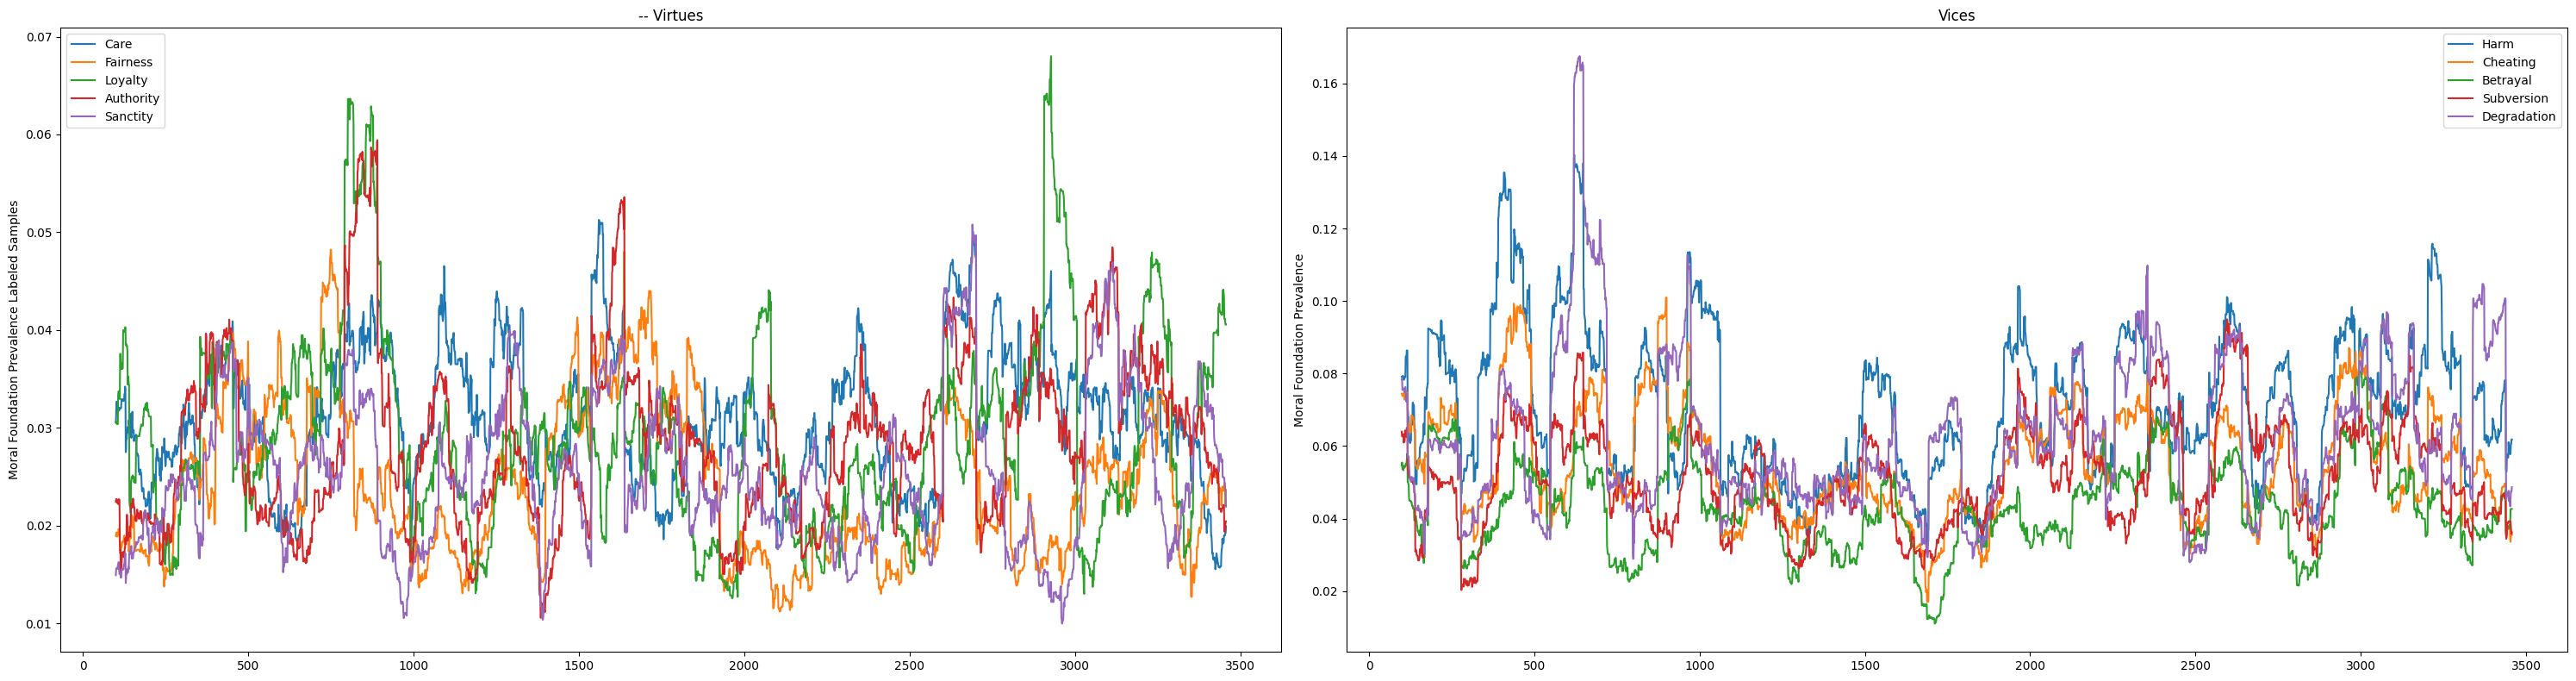

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(30,8))

df_[virtues].rolling(100).mean().plot(ax=ax[0])
#df.despine(offset=10)
ax[0].legend(loc='upper left', labels=['Care','Fairness','Loyalty','Authority','Sanctity'])
ax[0].set_title("-- Virtues")
ax[0].set_ylabel('Moral Foundation Prevalence Labeled Samples')


df_[vices].rolling(100).mean().plot(ax=ax[1])
#df.despine(offset=10)
ax[1].legend(loc='upper right', labels=['Harm','Cheating','Betrayal','Subversion','Degradation'])
ax[1].set_title("Vices")

plt.ylabel('Moral Foundation Prevalence')
plt.tight_layout()
plt.show()

In [ ]:
df[["comments", "label"]].iloc[700:900]

,comments,label
700,& gt seems really upset sad . angry thankful.s...,Care
701,used dirty followed nazi baby bottle penetrate...,Equality
702,"id like send warm fuck everyone voted gop , ho...",Purity
703,mean child ?,"Care,Purity,Proportionality"
704,& gt & gt regardless something others involved...,Proportionality
...,...,...
895,mother full time job like . days starts 8 home...,"Care,Proportionality"
896,note democrats . republicans . many politician...,Authority
897,'s article techniques talk racist family frien...,Equality
898,"aw shit , son : ( stop asap . seriously . coul...",Care


In [ ]:
df.label.value_counts()

Care                                  651
Authority                             453
Equality                              435
Proportionality                       313
Loyalty                               170
                                     ... 
Purity,Authority,Equality               1
Care,Loyalty,Authority,Equality         1
Care,Equality,Purity                    1
Loyalty,Equality,Proportionality        1
Proportionality,Equality,Authority      1
Name: label, Length: 93, dtype: int64

In [ ]:
df_un = vice_virtue(df_unlabeled)
df_un.head()

,care_p,fairness_p,loyalty_p,authority_p,sanctity_p,care_sent,fairness_sent,loyalty_sent,authority_sent,sanctity_sent,...,care,harm,fairness,cheating,loyalty,betrayal,authority,subversion,sanctity,degradation
0,0.113279,0.143946,0.001819,-0.487664,0.011541,0.005749,0.015614,0.044267,0.065964,0.043355,...,0.000651,0.000000,0.002248,0.000000,0.000081,0.000000,0.0,0.032169,0.000500,0.000000
1,-0.011297,0.252777,0.558547,0.053178,0.255337,-0.081524,0.061144,0.041118,-0.020148,0.024552,...,0.000921,0.000000,0.015456,0.000000,0.022967,0.000000,0.0,0.001071,0.006269,0.000000
2,0.096301,0.561897,0.381796,0.153900,-0.013021,-0.019964,0.025077,0.032671,-0.032442,0.021300,...,0.000000,0.001923,0.014090,0.000000,0.012473,0.000000,0.0,0.004993,0.000000,0.000277
3,0.711349,0.030481,0.481083,0.085297,0.104482,-0.215034,-0.057929,-0.078671,-0.128706,-0.126556,...,0.000000,0.152965,0.000000,0.001766,0.000000,0.037848,0.0,0.010978,0.000000,0.013223
4,-0.025903,0.448929,-0.099107,-0.114464,0.033275,-0.053993,0.041378,-0.010367,0.024725,-0.107404,...,0.001399,0.000000,0.018576,0.000000,0.001027,0.000000,0.0,0.002830,0.000000,0.003574


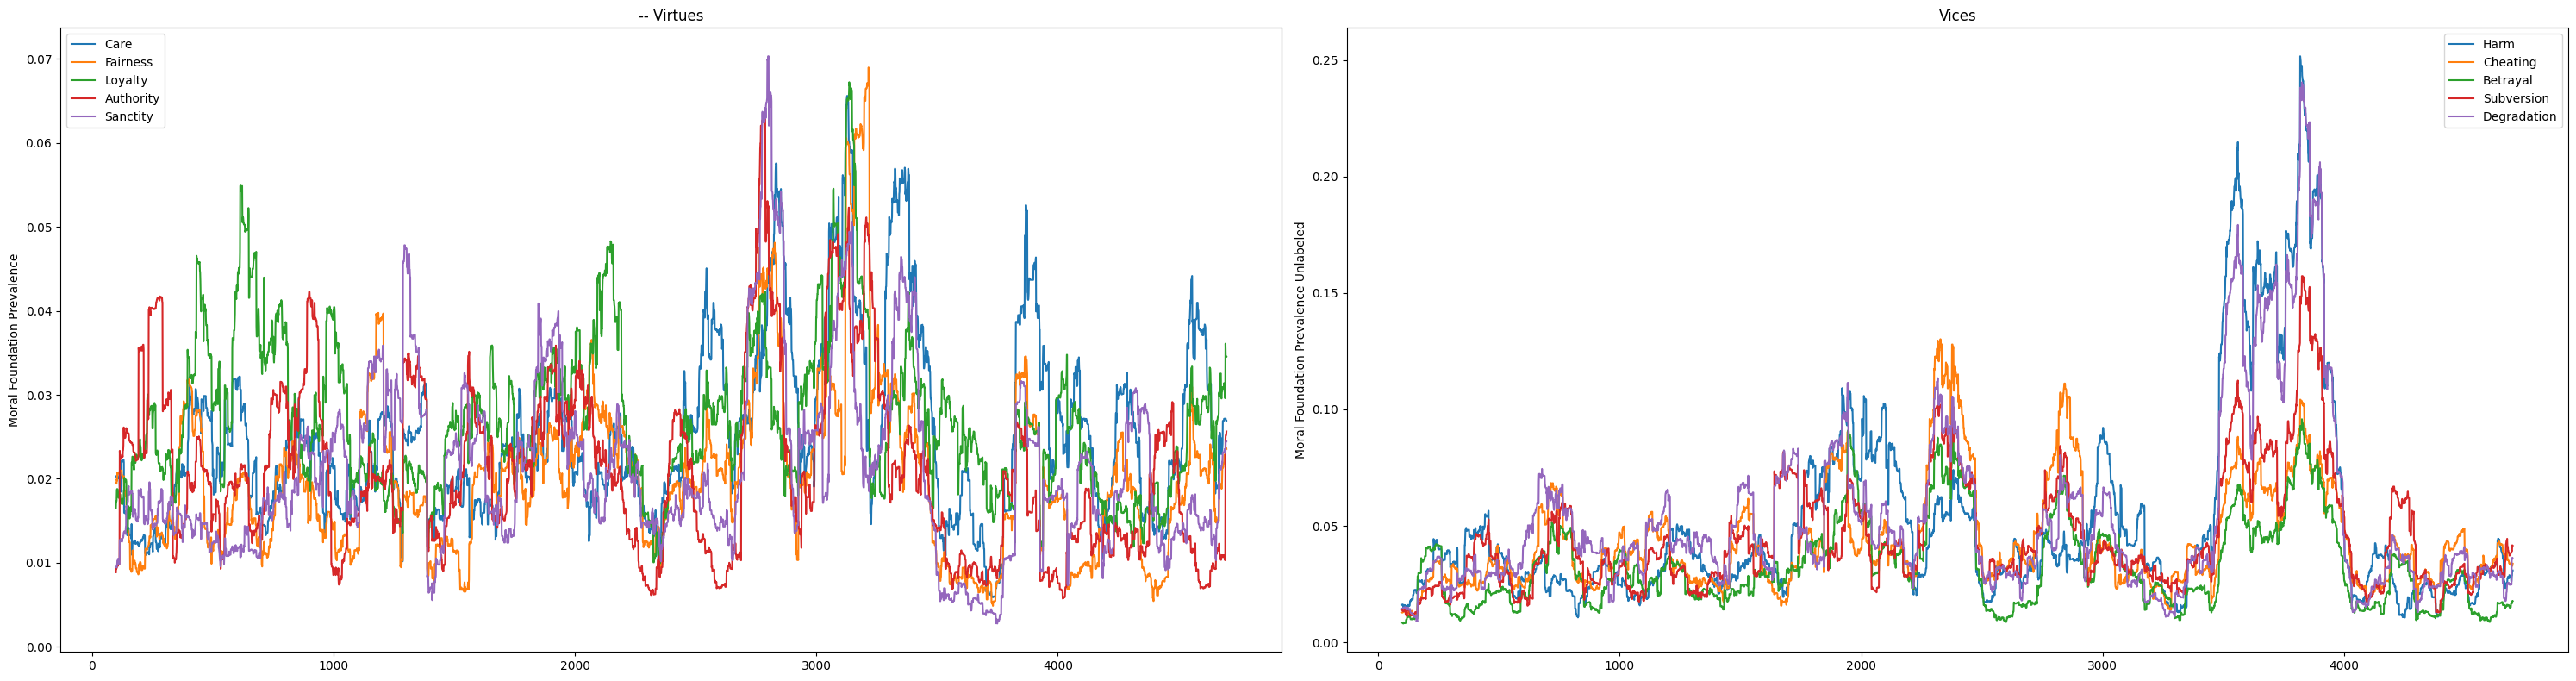

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(30,8))

df_un[virtues].rolling(100).mean().plot(ax=ax[0])
#df.despine(offset=10)
ax[0].legend(loc='upper left', labels=['Care','Fairness','Loyalty','Authority','Sanctity'])
ax[0].set_title("-- Virtues")
ax[0].set_ylabel('Moral Foundation Prevalence')


df_un[vices].rolling(100).mean().plot(ax=ax[1])
#df.despine(offset=10)
ax[1].legend(loc='upper right', labels=['Harm','Cheating','Betrayal','Subversion','Degradation'])
ax[1].set_title("Vices")

plt.ylabel('Moral Foundation Prevalence Unlabeled')
plt.tight_layout()
plt.show()